# หัดใช้ Autoencoders ทำ Image Denoising

เอกสารประกอบ
- https://www.kaggle.com/code/shivamb/how-autoencoders-work-intro-and-usecases

In [1]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model

from random import randint
import pandas as pd
import numpy as np

In [2]:
import os
from tqdm import tqdm
import cv2  
import numpy as np

from PIL import Image 

def load_data(foloder,class_names):
    """
        Load the data:
    """
    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

    nb_classes = len(class_names)

    IMAGE_SIZE = (28, 28)
    
    
    
    datasets = [foloder]
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            if('.DS_Store' in folder):
                continue
                
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):    
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        #images = np.array(images, dtype = 'float32')
        images = np.array(images, dtype = 'int')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append([images, labels])

    return output

In [3]:
class_names = ['circles', 'squares','triangles']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

output = load_data('../lab11/images',class_names = ['circles', 'squares','triangles'])

100%|██████████| 100/100 [00:00<00:00, 1124.76it/s]

Loading ../lab11/images


In [4]:
data,label = output[0]

In [5]:
from sklearn.utils import shuffle
train_images, train_labels = shuffle(data, label, random_state=22)
train_images = train_images/255
train_images = np.dot(train_images[...,:3], [0.299, 0.587, 0.114])

In [101]:
def loadimage2arr(path):
    image = cv2.imread(path)
    IMAGE_SIZE = (28,28)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE) 
    return image

In [6]:
def preview_examples(class_names, images, labels,maxdisplay=25):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of images of the dataset", fontsize=16)
    for i in range(maxdisplay):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [7]:
train_images = train_images - 1

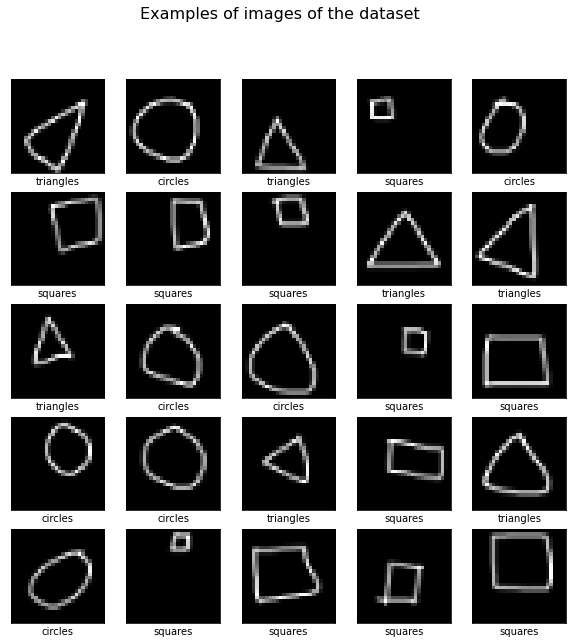

In [8]:
preview_examples(class_names,train_images,train_labels)

In [9]:
train_images[0]

array([[-1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16],
       [-1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        -1.11022302e-16, -1.11

In [73]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(20, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [74]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_32 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
dense_33 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_34 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_35 (Dense)             (None, 20)                10020     
_________________________________________________________________
dense_36 (Dense)             (None, 500)               10500     
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              5010

In [75]:
#28*28
train_x = train_images.reshape(-1, 784)

In [85]:
model.compile(optimizer='adam', loss='mse')
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=100, batch_size=50,
          #validation_data=(val_x, val_x),
          #callbacks=[early_stopping]
         )

Epoch 1/100
6/6 [==============================] - 1s 52ms/step - loss: 0.0035
Epoch 2/100
6/6 [==============================] - 0s 53ms/step - loss: 0.0034
Epoch 3/100
6/6 [==============================] - 0s 51ms/step - loss: 0.0028
Epoch 4/100
6/6 [==============================] - 0s 52ms/step - loss: 0.0025
Epoch 5/100
6/6 [==============================] - 0s 55ms/step - loss: 0.0021
Epoch 6/100
6/6 [==============================] - 0s 65ms/step - loss: 0.0019
Epoch 7/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0017
Epoch 8/100
6/6 [==============================] - 1s 144ms/step - loss: 0.0015
Epoch 9/100
6/6 [==============================] - 1s 104ms/step - loss: 0.0014
Epoch 10/100
6/6 [==============================] - 1s 88ms/step - loss: 0.0013
Epoch 11/100
6/6 [==============================] - 1s 94ms/step - loss: 0.0012
Epoch 12/100
6/6 [==============================] - 0s 45ms/step - loss: 0.0011
Epoch 13/100
6/6 [=============================

6/6 [==============================] - 0s 72ms/step - loss: 1.2913e-04
Epoch 100/100
6/6 [==============================] - 0s 67ms/step - loss: 1.2242e-04


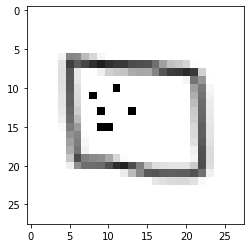

In [110]:
#โหลด file ทดสอบขึ้นมาดู ที่มี noise ใน images
name = 'noise03'
m1 = loadimage2arr(name+'.png')
plt.imshow(m1)  

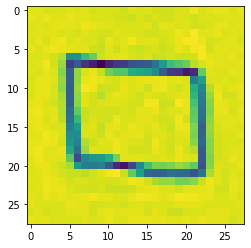

In [111]:
#ผลลัพธ์ เอาไปใส่ model
m1_c = m1/255
m1_c = np.dot(m1_c[...,:3], [0.299, 0.587, 0.114])
m1_c = m1_c - 1
m1_c = m1_c.reshape(-1, 784)

predsTrain = model.predict(m1_c)   #ดูผลลัพธ์ของ model
c = predsTrain[0].reshape(28,28)
plt.imshow(c)

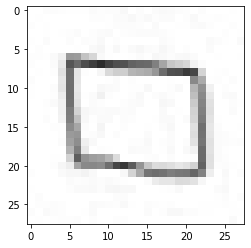

In [112]:
import matplotlib

stacked_img = np.stack((c,)*3, axis=-1)
stacked_img = (stacked_img+1)*255
stacked_img = np.array(stacked_img,int)
stacked_img = np.where(stacked_img>255,255,stacked_img)

plt.imshow(stacked_img)
stacked_img = stacked_img.astype(np.uint8)
matplotlib.image.imsave('output'+name+'.png', stacked_img)

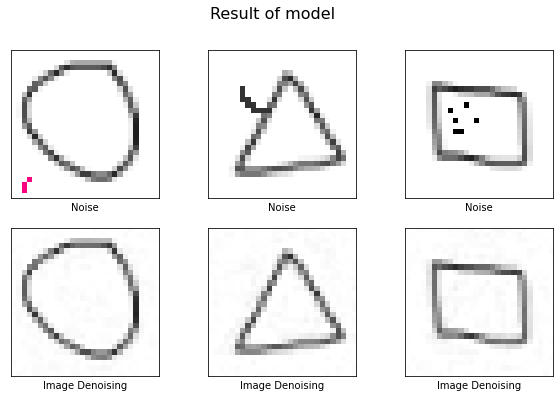

In [114]:
k = ['noise01.png','noise02.png','noise03.png','outputnoise01.png','outputnoise02.png','outputnoise03.png']
fig = plt.figure(figsize=(10,6))
fig.suptitle("Result of model", fontsize=16)
for i in range(len(k)):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = loadimage2arr(k[i])
    plt.imshow(img, cmap=plt.cm.binary)
    if(i<3):
      plt.xlabel('Noise')
    else:
      plt.xlabel('Image Denoising')   
plt.show()